## XGBoost Model

importing Jupyter notebook from Head_file.ipynb
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.14126

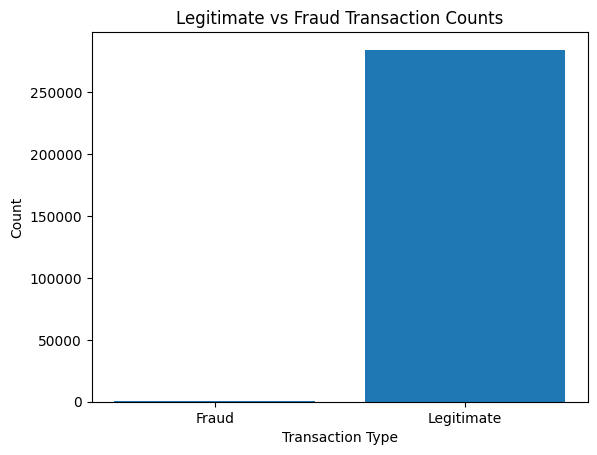

0.1727485630620034
Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     5686

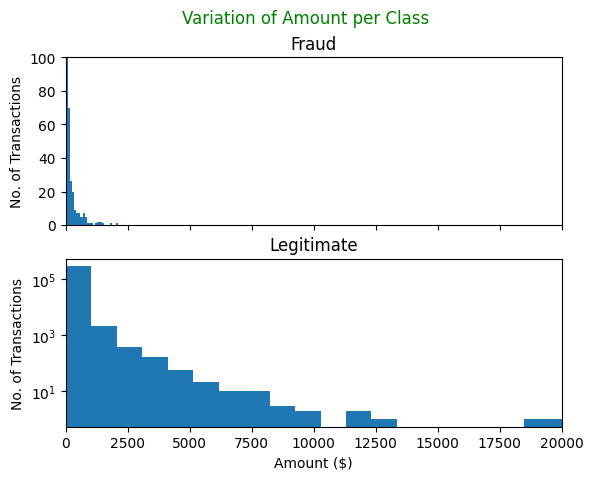

In [1]:
# importing Head_file to use the prepared dataset for model fitting.

import import_ipynb
import Head_file # this will import our head file 

In [2]:
# importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef
from imblearn.metrics import specificity_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [3]:
def XGBoost_model(data,cla55):
    # we are gonna split the dataset
    np.random.seed(56)
    X_train, X_test, y_train, y_test = train_test_split(data,cla55,test_size=0.25)
    
    XGB = XGBClassifier()
    XGB.fit(X_train,y_train)
    # Training Prediction
    print("----Training Prediction-----")
    y_preds_train = XGB.predict(X_train)

    cf_matrix = confusion_matrix(y_train, y_preds_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds_train)}\n\n")
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Martix", fontsize=16);
    ax.set(xlabel="Predicted Label", ylabel="Actual Label");
    print("Metrics (Training):")
    print(f"Accuracy: {accuracy_score(y_train, y_preds_train)*100:.2f}%")
    print(f"Precision: {precision_score(y_train, y_preds_train):.2f}")
    print(f"Sensitivity (Recall): {recall_score(y_train, y_preds_train):.2f}")
    print(f"Specificity: {specificity_score(y_train, y_preds_train):.2f}")
    print(f"MCC: {matthews_corrcoef(y_train, y_preds_train):.2f}")

    # Test Prediction
    print("----Testing Prediction----")
    y_preds_test = XGB.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds_test)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds_test)

    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",fontsize=16);
    ax.set(xlabel="Predicted Label", ylabel="Actual Label");

    print("Metrics (Test):")
    print(f"Accuracy: {accuracy_score(y_test, y_preds_test)*100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds_test):.2f}")
    print(f"Sensitivity (Recall): {recall_score(y_test, y_preds_test):.2f}")
    print(f"Specificity: {specificity_score(y_test, y_preds_test):.2f}")
    print(f"MCC: {matthews_corrcoef(y_test, y_preds_test):.2f}")
    

## XGBoost on Unsampled Dataset

----Training Prediction-----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213242
           1       1.00      1.00      1.00       363

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605



Metrics (Training):
Accuracy: 100.00%
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
MCC: 1.00
----Testing Prediction----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71073
           1       0.92      0.81      0.86       129

    accuracy                           1.00     71202
   macro avg       0.96      0.91      0.93     71202
weighted avg       1.00      1.00      1.00     71202



Metrics (Test):
Accuracy: 99.95%
Precision: 0.92
Sensitivity (Recall): 0.81
Specificity: 1.00
MCC: 0.87


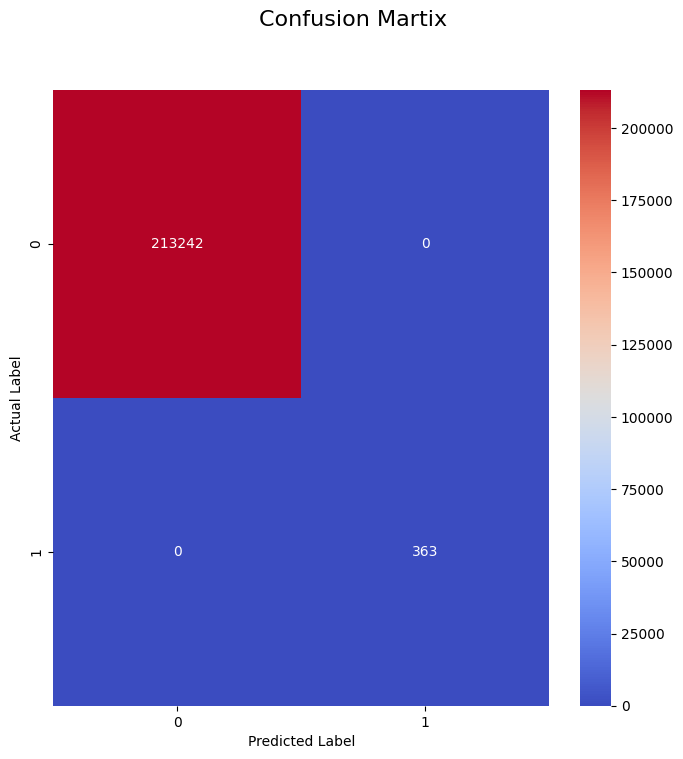

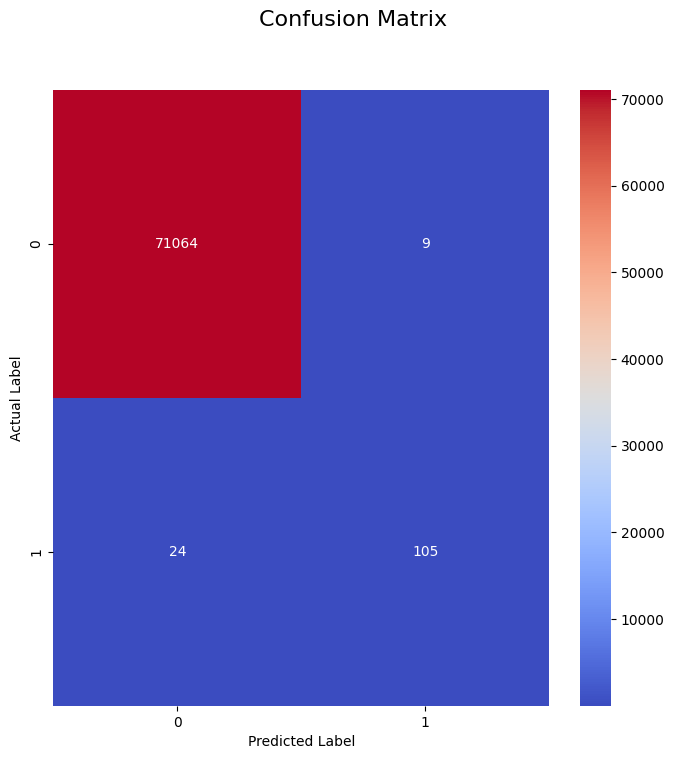

In [4]:
XGBoost_model(Head_file.data,Head_file.cla55)

## XGBoost on Under Sampled Dataset

----Training Prediction-----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       368

    accuracy                           1.00       738
   macro avg       1.00      1.00      1.00       738
weighted avg       1.00      1.00      1.00       738



Metrics (Training):
Accuracy: 100.00%
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
MCC: 1.00
----Testing Prediction----
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       122
           1       0.98      0.89      0.93       124

    accuracy                           0.93       246
   macro avg       0.94      0.94      0.93       246
weighted avg       0.94      0.93      0.93       246



Metrics (Test):
Accuracy: 93.50%
Precision: 0.98
Sensitivity (Recall): 0.89
Specificity: 0.98
MCC: 0.87


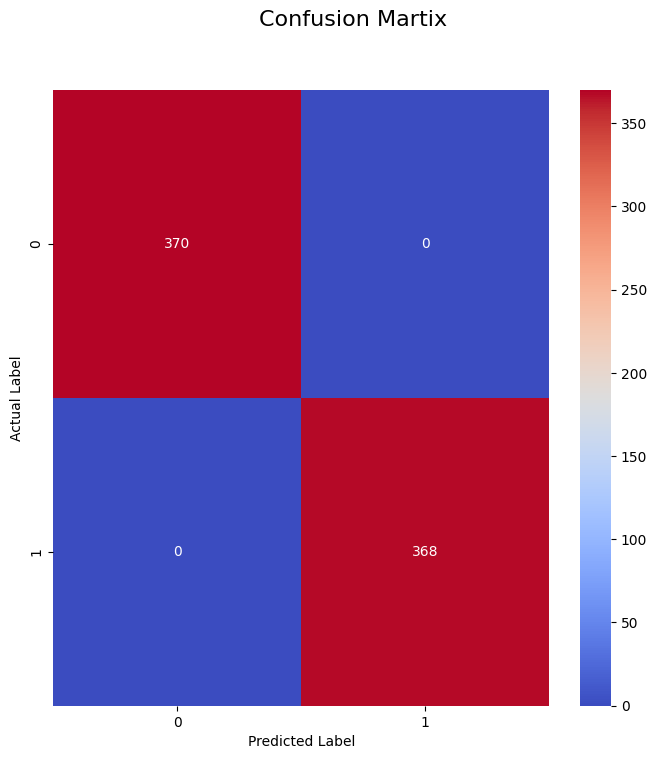

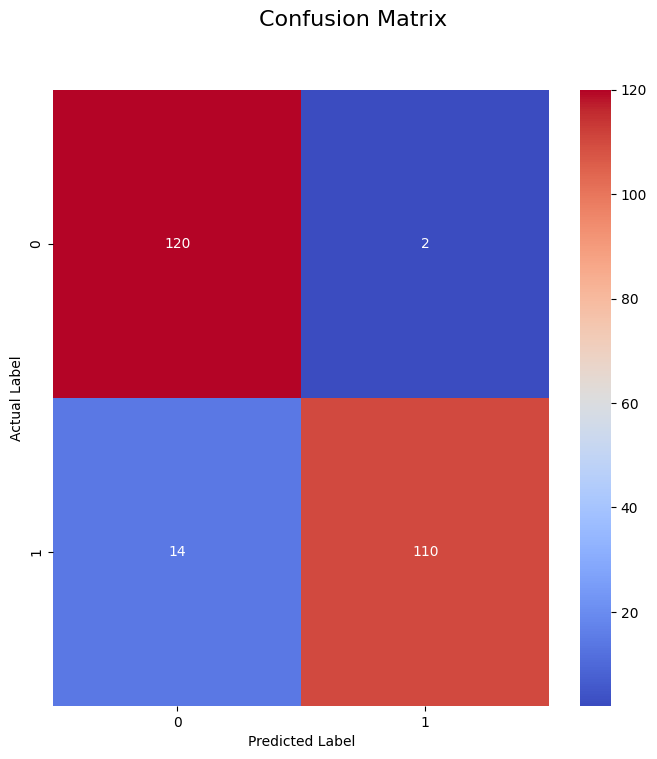

In [5]:
XGBoost_model(Head_file.Data_undersampled, Head_file.class_undersampled)

## XGBoost on Oversampled Dataset

----Training Prediction-----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213497
           1       1.00      1.00      1.00    212975

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



Metrics (Training):
Accuracy: 100.00%
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
MCC: 1.00
----Testing Prediction----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70818
           1       1.00      1.00      1.00     71340

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Metrics (Test):
Accuracy: 99.99%
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
MCC: 1.00


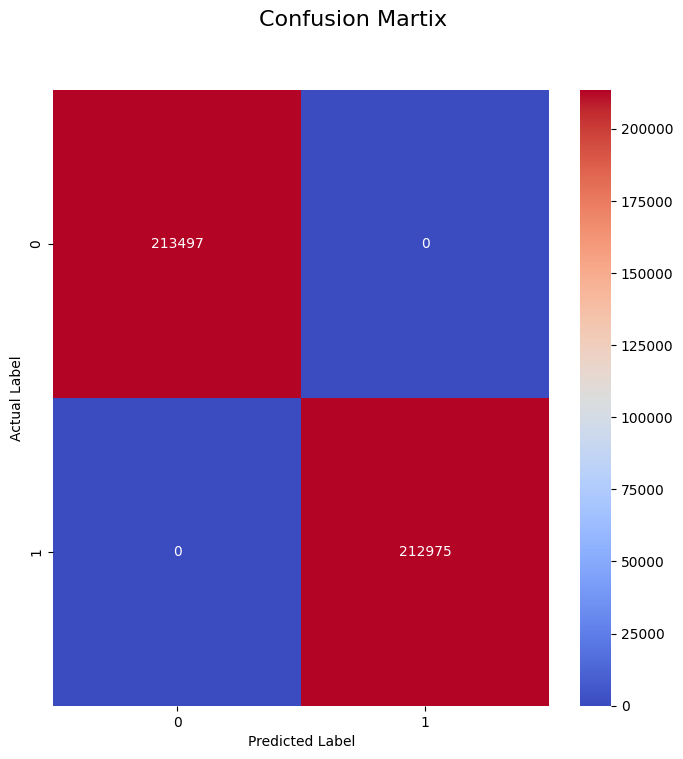

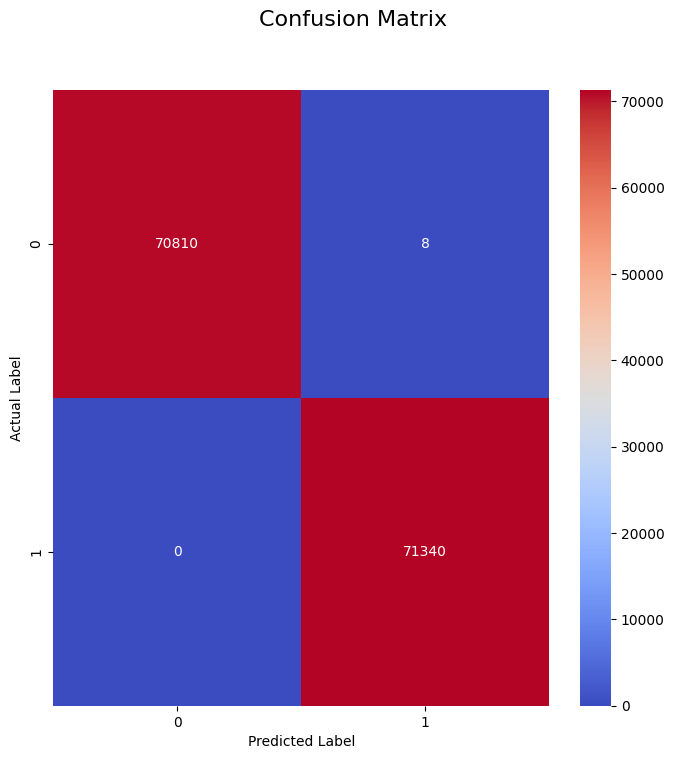

In [6]:
XGBoost_model(Head_file.Data_oversampled, Head_file.class_oversampled)

## XGBoost on SMOTE Dataset

----Training Prediction-----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212975
           1       1.00      1.00      1.00    213497

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472



Metrics (Training):
Accuracy: 100.00%
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
MCC: 1.00
----Testing Prediction----
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71340
           1       1.00      1.00      1.00     70818

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Metrics (Test):
Accuracy: 99.98%
Precision: 1.00
Sensitivity (Recall): 1.00
Specificity: 1.00
MCC: 1.00


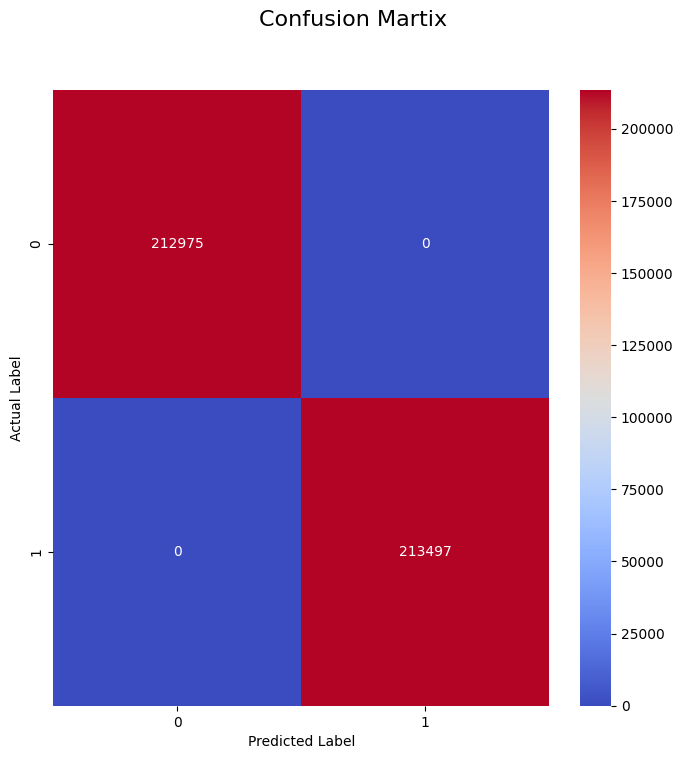

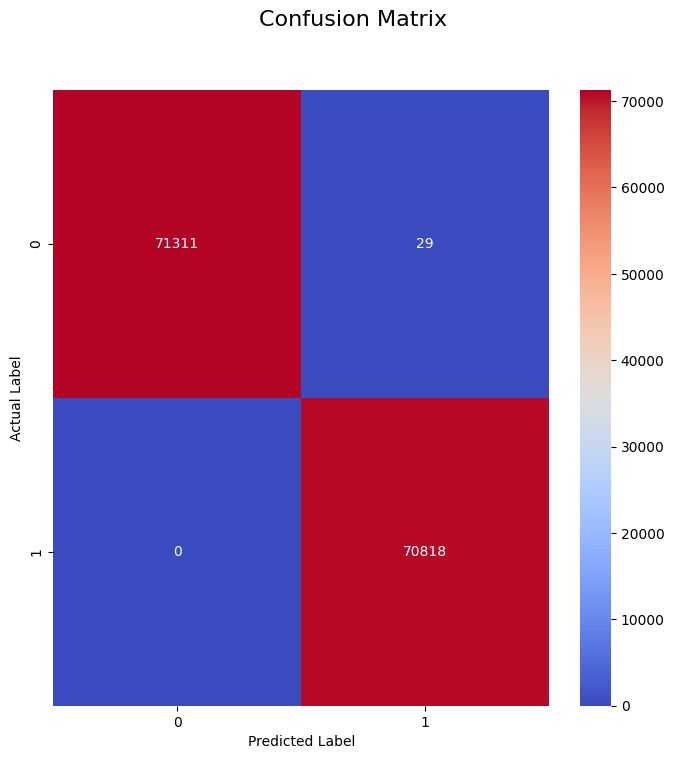

In [7]:
XGBoost_model(Head_file.Data_smote,Head_file.class_smote)